# Convolutional Neural Network

### Importing the libraries

In [117]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
import random

In [2]:
tf.__version__

'2.10.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [118]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1599 images belonging to 4 classes.


### Preprocessing the Test set

In [119]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 400 images belonging to 4 classes.


In [4]:
training_set[0]

(array([[[[1.1764707e-02, 1.1764707e-02, 1.1764707e-02],
          [1.1764707e-02, 1.1764707e-02, 1.1764707e-02],
          [1.1764707e-02, 1.1764707e-02, 1.1764707e-02],
          ...,
          [3.3848662e-02, 1.9607844e-02, 1.8369788e-02],
          [3.3848662e-02, 1.9607844e-02, 1.8369788e-02],
          [3.3848662e-02, 1.9607844e-02, 1.8369788e-02]],
 
         [[1.1764707e-02, 1.1764707e-02, 1.1764707e-02],
          [1.1764707e-02, 1.1764707e-02, 1.1764707e-02],
          [1.1764707e-02, 1.1764707e-02, 1.1764707e-02],
          ...,
          [4.6966448e-02, 1.9607844e-02, 1.1810896e-02],
          [4.6966448e-02, 1.9607844e-02, 1.1810896e-02],
          [4.6966448e-02, 1.9607844e-02, 1.1810896e-02]],
 
         [[1.1764707e-02, 1.1764707e-02, 1.1764707e-02],
          [1.1764707e-02, 1.1764707e-02, 1.1764707e-02],
          [1.1764707e-02, 1.1764707e-02, 1.1764707e-02],
          ...,
          [4.0546123e-02, 2.2864195e-02, 1.8277409e-02],
          [4.0546123e-02, 2.2864195e-

## Part 2 - Building the CNN

### Initialising the CNN

In [120]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [121]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [122]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [123]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [124]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [125]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [126]:
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

## Part 3 - Training the CNN

### Compiling the CNN

In [127]:
cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [128]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 45)

Epoch 1/45
50/50 [==============================] - 33s 649ms/step - loss: 1.3303 - accuracy: 0.3446 - val_loss: 1.2749 - val_accuracy: 0.3875
Epoch 2/45
50/50 [==============================] - 32s 640ms/step - loss: 1.2546 - accuracy: 0.4034 - val_loss: 1.3073 - val_accuracy: 0.4425
Epoch 3/45
50/50 [==============================] - 32s 640ms/step - loss: 1.1731 - accuracy: 0.4941 - val_loss: 1.2131 - val_accuracy: 0.4800
Epoch 4/45
50/50 [==============================] - 32s 645ms/step - loss: 1.1110 - accuracy: 0.5203 - val_loss: 1.1692 - val_accuracy: 0.5175
Epoch 5/45
50/50 [==============================] - 32s 646ms/step - loss: 1.0489 - accuracy: 0.5585 - val_loss: 1.1915 - val_accuracy: 0.5350
Epoch 6/45
50/50 [==============================] - 32s 650ms/step - loss: 1.0090 - accuracy: 0.5854 - val_loss: 1.3140 - val_accuracy: 0.5200
Epoch 7/45
50/50 [==============================] - 32s 635ms/step - loss: 0.9436 - accuracy: 0.6141 - val_loss: 1.1572 - val_accuracy: 0.5450

In [15]:
cnn.evaluate(test_set)

13/13 [==============================] - 7s 462ms/step - loss: 1.4767 - accuracy: 0.6350


[1.476702094078064, 0.6349999904632568]

## Part 4 - Making a single prediction

1/1 [==============================] - 0s 14ms/step


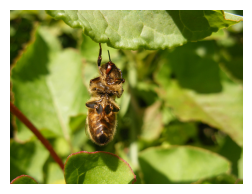

The predicted category is: spider


In [147]:
# Categories corresponding to the class labels
categories = ['ant', 'bee', 'cockroach', 'spider']

# Function to load a random image from the test set
def load_random_image(test_image_directory):
    # Randomly pick a category folder (ant, bee, cockroach, spider)
    random_class = random.choice(os.listdir(test_image_directory))
    random_image_folder = os.path.join(test_image_directory, random_class)
    
    # Randomly pick an image from the selected category
    random_image_filename = random.choice(os.listdir(random_image_folder))
    random_image_path = os.path.join(random_image_folder, random_image_filename)
    
    # Load and preprocess the image
    test_image = image.load_img(random_image_path, target_size=(64, 64))
    test_image_array = image.img_to_array(test_image)
    test_image_array = np.expand_dims(test_image_array, axis=0)  # Add batch dimension
    test_image_array = test_image_array / 255.0  # Normalize pixel values

    return test_image_array, random_image_path  # Return image array and path to display

# Set directory for test images
test_image_directory = 'dataset/test_set'

# Load a random image from the test set
test_image_array, random_image_path = load_random_image(test_image_directory)

# Make prediction
result = cnn.predict(test_image_array)

# Find the index of the class with the highest probability
predicted_class_index = np.argmax(result, axis=1)[0]

# Get the corresponding category label
predicted_category = categories[predicted_class_index]

# Display the image
plt.figure(figsize=(3, 3))  # Set the figure size (width, height)
img = image.load_img(random_image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Print the predicted category
print(f"The predicted category is: {predicted_category}")


In [30]:
# Plotting Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

dog
